## ConvNet

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding='same', input_shape=(128, 128, 1)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(ReLU())
model.add(Dense(26))
model.add(Activation('softmax'))

Or

In [3]:
model = Sequential()
model.add(
    Conv2D(16, kernel_size=(3, 3), strides=(2, 2), 
           padding='same', activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(26, activation='softmax'))

Or

In [4]:
from tensorflow.keras import Input, Model

inputs = Input(shape=(128, 128, 1))
layer = Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
layer = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(512, activation='relu')(layer)
outputs = Dense(26, activation='softmax')(layer)

model = Model(inputs, outputs)

Then

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               8389120   
                                                                 
 dense_5 (Dense)             (None, 26)                13338     
                                                             

## VGG-16

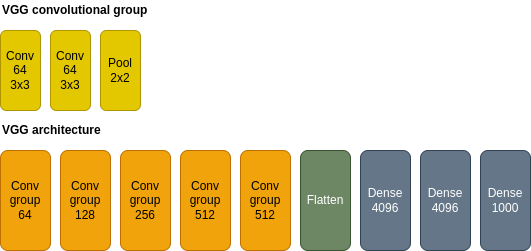

In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), (1, 1), 'same', activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(128, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(128, (3, 3), (1, 1), 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(256, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(256, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(256, (3, 3), (1, 1), 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(512, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(512, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(512, (3, 3), (1, 1), 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Conv2D(512, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(512, (3, 3), (1, 1), 'same', activation='relu'))
model.add(Conv2D(512, (3, 3), (1, 1), 'same', activation='relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

Or

In [7]:
def conv_block(n_layers: int, n_filters: int) -> None:
    for _ in range(n_layers):
        model.add(Conv2D(n_filters, (3, 3), (1, 1), 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
model = Sequential()
model.add(Conv2D(64, (3, 3), (1, 1), 'same', activation='relu', input_shape=(224, 224, 3)))
conv_block(1, 64)
conv_block(2, 128)
conv_block(3, 256)
conv_block(3, 512)
conv_block(3, 512)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))

Then

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

## ResNet34

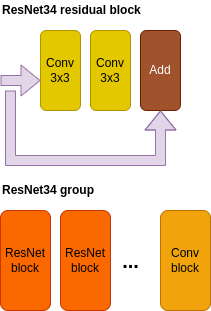

In [9]:
import tensorflow.keras.layers as layers

def residual_block(n_filters: int, x):
    shortcut = x
    x = layers.Conv2D(n_filters, (3, 3), (1, 1), 'same', activation='relu')(x)
    x = layers.Conv2D(n_filters, (3, 3), (1, 1), 'same', activation='relu')(x)    
    x = layers.add([shortcut, x])
    return x

def conv_block(n_filters: int, x):
    x = layers.Conv2D(n_filters, (3, 3), (2, 2), 'same', activation='relu')(x)
    x = layers.Conv2D(n_filters, (3, 3), (2, 2), 'same', activation='relu')(x)    
    return x

inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(64, (7, 7), (2, 2), 'same', activation='relu')(inputs)
x = layers.MaxPooling2D((3, 3), (2, 2))(x)

x = residual_block(64, x)
x = residual_block(64, x)
x = conv_block(128, x)

x = residual_block(128, x)
x = residual_block(128, x)
x = residual_block(128, x)
x = conv_block(256, x)

for _ in range(5):
    x = residual_block(256, x)
x = conv_block(512, x)

for _ in range(2):
    x = residual_block(512, x)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(1000, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 55, 55, 64)  0           ['conv2d_29[0][0]']              
 )                                                                                          

 conv2d_52 (Conv2D)             (None, 4, 4, 256)    590080      ['add_8[0][0]']                  
                                                                                                  
 conv2d_53 (Conv2D)             (None, 4, 4, 256)    590080      ['conv2d_52[0][0]']              
                                                                                                  
 add_9 (Add)                    (None, 4, 4, 256)    0           ['add_8[0][0]',                  
                                                                  'conv2d_53[0][0]']              
                                                                                                  
 conv2d_54 (Conv2D)             (None, 2, 2, 512)    1180160     ['add_9[0][0]']                  
                                                                                                  
 conv2d_55 (Conv2D)             (None, 1, 1, 512)    2359808     ['conv2d_54[0][0]']              
          

## ResNet50

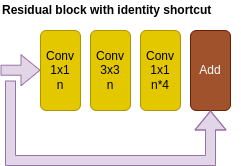

In [10]:
# Original Bottleneck Residual Block
def bottleneck_block(n_filters: int, x):
    shortcut = x
    x = layers.Conv2D(n_filters, (1, 1), (1, 1), 'same', activation='relu')(x)
    x = layers.Conv2D(n_filters, (3, 3), (1, 1), 'same', activation='relu')(x)  # bottleneck convolution
    x = layers.Conv2D(n_filters * 4, (1, 1), (1, 1), 'same', activation='relu')(x)
    x = layer.add([shortcut, x])
    return x

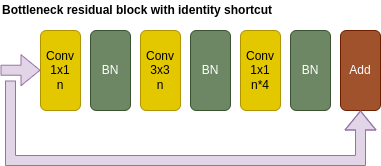

In [11]:
def identity_block(n_filters, x):
    """Creates a bottleneck residual block of ResNet50 v1"""
    shortcut = x
    
    x = layers.Conv2D(n_filters, kernel_size=(1, 1), strides=(1, 1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(n_filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(n_filters * 4, kernel_size=(1, 1), strides=(1, 1))(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.add([shortcut, x])
    x = layers.ReLU()(x)
    
    return x

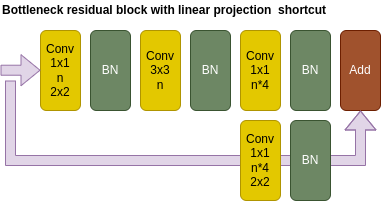

In [12]:
def projection_block(n_filters, x, strides=(2, 2)):
    """Creates block of convolutions with feature pooling of ResNet50 v1"""
    shortcut = layers.Conv2D(n_filters * 4, kernel_size=(1, 1), strides=strides)(x)
    shortcut = layers.BatchNormalization()(shortcut)
    
    x = layers.Conv2D(n_filters, kernel_size=(1, 1), strides=strides)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(n_filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(n_filters * 4, kernel_size=(1, 1), strides=(1, 1))(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    
    return x

**ResNet50 v1**

In [13]:
inputs = layers.Input(shape=(224, 224, 3))

x = layers.ZeroPadding2D(padding=(3, 3))(inputs)
x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='valid')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.ZeroPadding2D(padding=(1, 1))(x)
x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)

x = projection_block(64, x, strides=(1, 1))

x = identity_block(64, x)
x = identity_block(64, x)

x = projection_block(128, x)

x = identity_block(128, x)
x = identity_block(128, x)
x = identity_block(128, x)

x = projection_block(256, x)

x = identity_block(256, x)
x = identity_block(256, x)
x = identity_block(256, x)
x = identity_block(256, x)
x = identity_block(256, x)

x = projection_block(512, x)

x = identity_block(512, x)
x = identity_block(512, x)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(1000, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv2d_60 (Conv2D)             (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

 conv2d_69 (Conv2D)             (None, 56, 56, 64)   36928       ['re_lu_9[0][0]']                
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 56, 56, 64)  256         ['conv2d_69[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 re_lu_10 (ReLU)                (None, 56, 56, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 conv2d_70 (Conv2D)             (None, 56, 56, 256)  16640       ['re_lu_10[0][0]']               
                                                                                                  
 batch_normalization_10 (BatchN  (None, 56, 56, 256)  1024       ['conv2d_70[0][0]']              
 ormalizat

                                                                                                  
 conv2d_80 (Conv2D)             (None, 28, 28, 512)  66048       ['re_lu_19[0][0]']               
                                                                                                  
 batch_normalization_20 (BatchN  (None, 28, 28, 512)  2048       ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_17 (Add)                   (None, 28, 28, 512)  0           ['re_lu_17[0][0]',               
                                                                  'batch_normalization_20[0][0]'] 
                                                                                                  
 re_lu_20 (ReLU)                (None, 28, 28, 512)  0           ['add_17[0][0]']                 
          

                                                                                                  
 batch_normalization_30 (BatchN  (None, 14, 14, 1024  4096       ['conv2d_90[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 add_20 (Add)                   (None, 14, 14, 1024  0           ['re_lu_26[0][0]',               
                                )                                 'batch_normalization_30[0][0]'] 
                                                                                                  
 re_lu_29 (ReLU)                (None, 14, 14, 1024  0           ['add_20[0][0]']                 
                                )                                                                 
                                                                                                  
 conv2d_91

                                )                                 'batch_normalization_39[0][0]'] 
                                                                                                  
 re_lu_38 (ReLU)                (None, 14, 14, 1024  0           ['add_23[0][0]']                 
                                )                                                                 
                                                                                                  
 conv2d_100 (Conv2D)            (None, 14, 14, 256)  262400      ['re_lu_38[0][0]']               
                                                                                                  
 batch_normalization_40 (BatchN  (None, 14, 14, 256)  1024       ['conv2d_100[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 re_lu_39 

                                                                                                  
 conv2d_110 (Conv2D)            (None, 7, 7, 512)    1049088     ['re_lu_47[0][0]']               
                                                                                                  
 batch_normalization_50 (BatchN  (None, 7, 7, 512)   2048        ['conv2d_110[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 re_lu_48 (ReLU)                (None, 7, 7, 512)    0           ['batch_normalization_50[0][0]'] 
                                                                                                  
 conv2d_111 (Conv2D)            (None, 7, 7, 512)    2359808     ['re_lu_48[0][0]']               
                                                                                                  
 batch_nor

**ResNet50 v2**

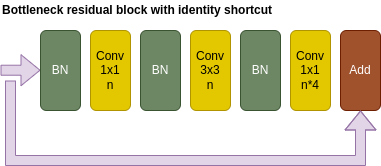

In [14]:
def identity_block(n_filters, x):
    """Creates a bottleneck residual block of ResNet50 v2"""
    shortcut = x
    
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(n_filters, kernel_size=(1, 1), strides=(1, 1))(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(n_filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(n_filters * 4, kernel_size=(1, 1), strides=(1, 1))(x)
    
    return x    